In [38]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

### Data exploration

In [39]:
# Load CSV file
car_df = pd.read_csv('Microsoft x Carsome Hackathon Auction Data Set - fancy-adventurous-peacock-62328.csv')

In [40]:
car_df.head()

,lead_id,marketplace_id,marketplace_car_id,used_dealer_company_id,dealer_id,car_brand,car_model,car_variant,car_engine,car_year,car_transmission,reserveprice
0,928320,141263,292354,4620.0,4728,honda,freed,s,1.5,2012,Auto,85000000
1,944610,141300,299526,5033.0,5141,honda,city,vtec,1.5,2011,Auto,95000000
2,929573,141255,290464,4471.0,4579,honda,hr-v,s,1.5,2016,Auto,139000000
3,942475,141290,297815,4697.0,4805,suzuki,ertiga,gl,1.4,2016,Manual,115000000
4,926113,141273,294157,4351.0,4459,suzuki,ertiga,gx,1.4,2014,Manual,85000000


In [41]:
car_df.shape

(50000, 12)

### Data cleaning and exploration

In [42]:
# Drop the columns that will not be utilized.
drop_cols = ['lead_id', 'marketplace_id', 'marketplace_car_id', 'used_dealer_company_id', 'dealer_id']
car_df = car_df.drop(drop_cols, axis = 1)

In [43]:
# Check missing value
car_df.isnull().sum()

car_brand           0
car_model           0
car_variant         2
car_engine          1
car_year            0
car_transmission    0
reserveprice        0
dtype: int64

In [44]:
# Drop the null values.
car_df = car_df.dropna()

In [45]:
car_df

,car_brand,car_model,car_variant,car_engine,car_year,car_transmission,reserveprice
0,honda,freed,s,1.5,2012,Auto,85000000
1,honda,city,vtec,1.5,2011,Auto,95000000
2,honda,hr-v,s,1.5,2016,Auto,139000000
3,suzuki,ertiga,gl,1.4,2016,Manual,115000000
4,suzuki,ertiga,gx,1.4,2014,Manual,85000000
...,...,...,...,...,...,...,...
49995,toyota,avanza,g,1.3,2010,Manual,70000000
49996,honda,brio,rs,1.2,2017,Manual,408000000
49997,toyota,kijang innova,v,2.0,2019,Auto,290000000
49998,toyota,avanza,veloz,1.5,2017,Auto,135000000


In [46]:
# Create list of category columns and numeric columns
cat_df = ['car_brand', 'car_model', 'car_variant']
num_cols = ['car_engine', 'car_year', 'reserveprice', 'car_transmission']

In [47]:
car_df['car_brand'].unique()

array(['honda', 'suzuki', 'daihatsu', 'ford', 'isuzu', 'toyota',
       'mitsubishi', 'chevrolet', 'mazda', 'nissan', 'wuling', 'kia',
       'volkswagen', 'bmw', 'land rover', 'hyundai', 'peugeot',
       'mercedes-benz', 'mini', 'subaru', 'datsun', 'audi', 'ota',
       'renault', 'tata', 'fordta'], dtype=object)

In [48]:
car_df['car_model'].unique()

array(['freed', 'city', 'hr-v', 'ertiga', 'sigra', 'fiesta', 'brio',
       'mu-x', 'cr-v', 'br-v', 'calya', 'swift', 'xenia', 'xpander',
       'outlander', 'alphard', 'outlander sport', 'civic', 'avanza',
       'trax', 'delica', '8', 'mobilio', 'sienta', 'cx-30', 'jazz',
       'livina', 'grand livina', 'vellfire', 'fortuner', 'camry', 'juke',
       'gran max', 'terios', 'march', 'pajero sport', 'confero',
       'kijang innova', 'yaris', 'elysion', 'biante', 'sedona', 'polo',
       'cx-5', '3', 'trailblazer', 'rush', 'vios', 'panther', 'harrier',
       'triton', 'innova', 'pajero', 'almaz', 'range rover evoque',
       'tiguan', 'cx-9', 'x-over', 'voxy', 'grand avega', '207', 'serena',
       'x3', 'c-hr', 'mu-7', 'apv', '2', 'karimun', '6', 'terra',
       'kijang', 'x1', 'x-trail', 'cortez', 'limo', 'h-1', 'b', 'captiva',
       'rio', 'sx4', 'everest', 'ayla', 'kijang super', 'c', 'gle', 'e',
       'hilux', 'agya', 'carry', 'cx-3', 'cooper countryman', 'nav1',
       'ml', '

In [49]:
car_df['car_variant'].unique()

array(['s', 'vtec', 'gl', 'gx', 'm', 'rs', 'r2', '2wd', 'e', 'g', 'x',
       'ultimate', 'gls', 'px', 'fd1', 'r std', 'turbo ltz', 'royal',
       'no variant', 'satya e', 'gt', 'el', 'sv', 'z', 'g trd', 'v', 'rx',
       'd', 'tx', 'xs', 'dakar', 'i-dsi', 's l', 's ltd', 'i-vtec',
       'skyactiv', 'veloz', 'gt tsi', 'xv', 'touring', '20i (ckd)', 'ltz',
       'prestige', 's act lux', 'exceed', 'grand touring', '240 g',
       'dc gls 4x4', 'vrz', 'sport', 'v diesel', 'd exceed',
       'mugen prestige', 'vrz 4x2', 'lt lux + sc cvt', 'g-n140', 'tsi',
       'v lux', 'e plus', 'highway star', 'e prestige', 'dreza', '18i',
       'hybrid', 'reborn g', 'xdrive20i (ckd)', 'j', 'sport gt',
       'single tone', 'tfr85hg', 'luxury', '20i', 'dx', 's trd sportivo',
       'box', 'vl', 'r', 'lgx', 'sdrive18i', 'ls', 'st autech', 'c t lux',
       'tsi allspace', 'crdi', '200 urban', 'reborn v', 'se', 'turbo',
       'tc e', 's-cross', 'kf 42 short', '200 cgi (ckd)',
       '400 4matic (ckd)'

In [50]:
car_df['car_engine'].unique()

array([1.5, 1.4, 1. , 1.2, 2.5, 2.4, 2. , 1.3, 1.8, 2.3, 2.2, 3.7, 1.6,
       3. , 2.8, 3.5, 2.7, 3.2, 2.6, 4. , 4.7, 1.1, 3.3, 2.1, 3.9, 1.9,
       2.9, 1.7, 3.8])

In [51]:
car_df['car_year'].unique()

array([2012, 2011, 2016, 2014, 2019, 2013, 2020, 2018, 2015, 2010, 2017,
       2007, 2008, 2005, 2009, 1994, 2001, 2003, 2021, 2002, 1995, 1997,
       2004, 2006, 2000, 1996, 1989, 1990, 1998, 1993, 1991])

In [52]:
car_df['car_transmission'].unique()

array(['Auto', 'Manual'], dtype=object)

In [53]:
# Explore the data
car_df.describe()

,car_engine,car_year,reserveprice
count,49997.000000,49997.000000,4.999700e+04
mean,1.814315,2014.315919,1.659335e+08
std,0.526666,4.020775,1.254992e+08
min,1.000000,1989.000000,1.500000e+06
25%,1.500000,2012.000000,8.950000e+07
50%,1.500000,2015.000000,1.300000e+08
75%,2.200000,2017.000000,2.000000e+08
max,4.700000,2021.000000,9.000000e+08


In [54]:
# Check correlation of numeric features
corr = car_df[num_cols].corr(numeric_only=True)
corr

,car_engine,car_year,reserveprice
car_engine,1.000000,-0.249341,0.328706
car_year,-0.249341,1.000000,0.405830
reserveprice,0.328706,0.405830,1.000000


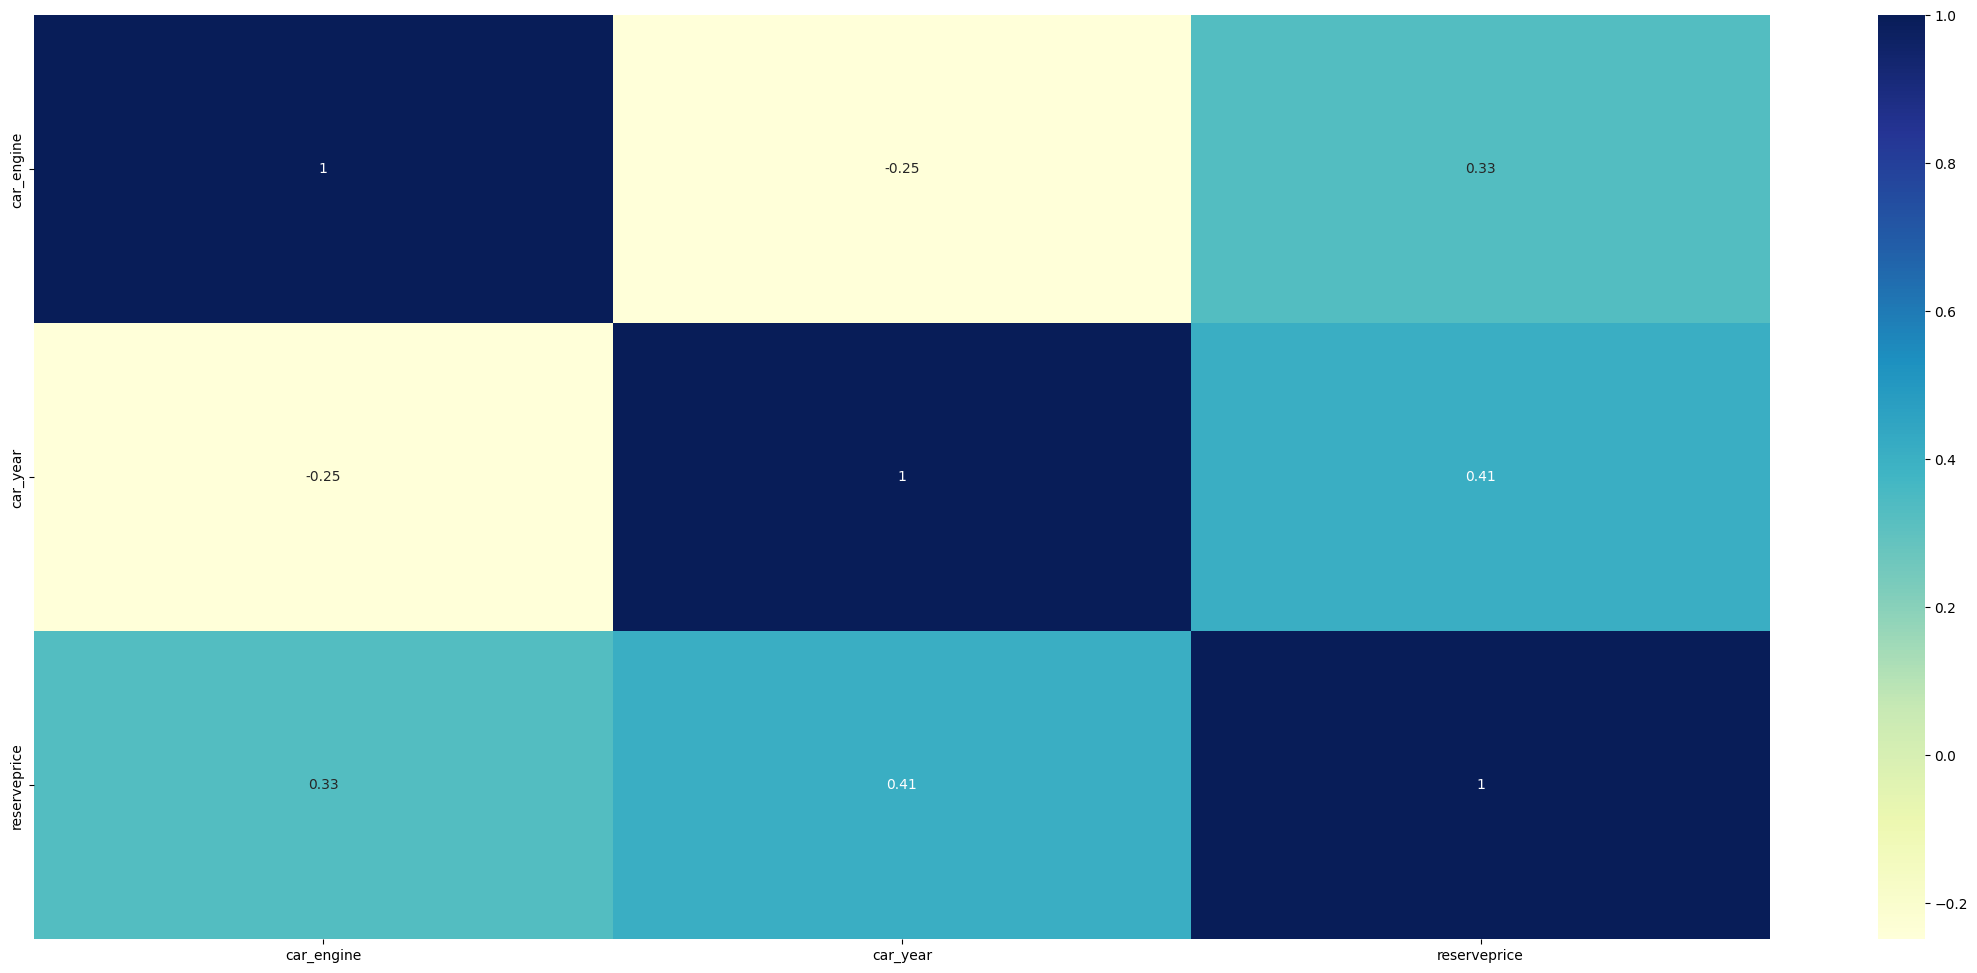

In [55]:
# Plotting the correlation
plt.figure(figsize=(28, 12))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

As a result, the correlation of the feature to the target value is not significant, so all the features will be utilized.

Text(0.5, 1.0, 'Boxplot figure of care reserve price')

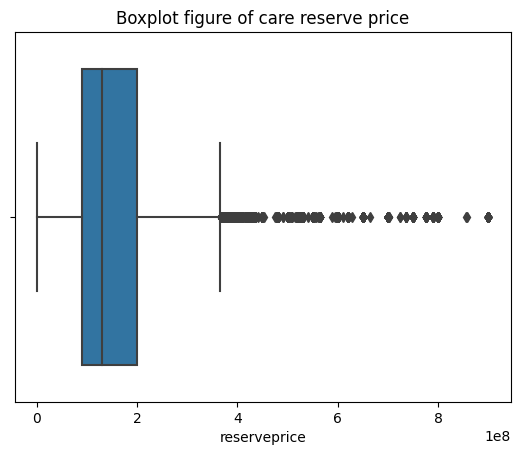

In [56]:
# Detect outlier of the car price.
sns.boxplot(data = car_df, x = car_df['reserveprice'])
plt.title("Boxplot figure of care reserve price")

<Axes: xlabel='reserveprice', ylabel='Density'>

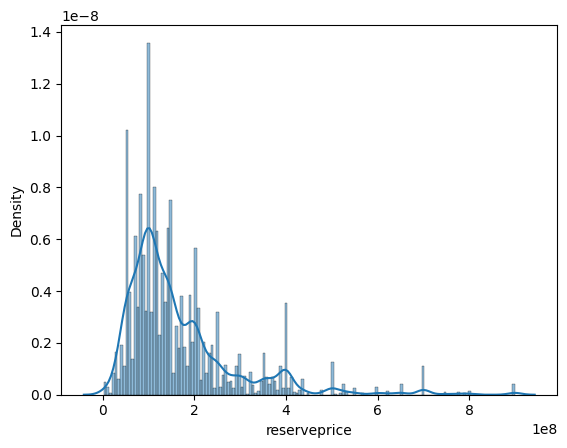

In [57]:
# Check the distribution of the price data
sns.histplot(
    car_df['reserveprice'], kde = True,
    stat = "density", kde_kws=dict(cut=3)
)

In [58]:
# Detect and remove outlier with IsolationForest

model = IsolationForest(n_estimators=100,
                       max_samples='auto',
                       contamination=.06,
                       max_features=1.0)
model.fit(car_df[['reserveprice']].values)

IsolationForest(contamination=0.06)

In [59]:
car_df['score']=model.decision_function(car_df[['reserveprice']].values)
car_df['anomaly']=model.predict(car_df[['reserveprice']].values)

In [60]:
car_df

,car_brand,car_model,car_variant,car_engine,car_year,car_transmission,reserveprice,score,anomaly
0,honda,freed,s,1.5,2012,Auto,85000000,0.144805,1
1,honda,city,vtec,1.5,2011,Auto,95000000,0.159147,1
2,honda,hr-v,s,1.5,2016,Auto,139000000,0.157224,1
3,suzuki,ertiga,gl,1.4,2016,Manual,115000000,0.160581,1
4,suzuki,ertiga,gx,1.4,2014,Manual,85000000,0.144805,1
...,...,...,...,...,...,...,...,...,...
49995,toyota,avanza,g,1.3,2010,Manual,70000000,0.147163,1
49996,honda,brio,rs,1.2,2017,Manual,408000000,-0.001704,-1
49997,toyota,kijang innova,v,2.0,2019,Auto,290000000,0.033184,1
49998,toyota,avanza,veloz,1.5,2017,Auto,135000000,0.155501,1


In [61]:
car_df_outlier_rm = car_df.loc[car_df['anomaly'] == 1]

In [62]:
car_df_outlier_rm

,car_brand,car_model,car_variant,car_engine,car_year,car_transmission,reserveprice,score,anomaly
0,honda,freed,s,1.5,2012,Auto,85000000,0.144805,1
1,honda,city,vtec,1.5,2011,Auto,95000000,0.159147,1
2,honda,hr-v,s,1.5,2016,Auto,139000000,0.157224,1
3,suzuki,ertiga,gl,1.4,2016,Manual,115000000,0.160581,1
4,suzuki,ertiga,gx,1.4,2014,Manual,85000000,0.144805,1
...,...,...,...,...,...,...,...,...,...
49994,mazda,biante,skyactiv,2.0,2012,Auto,110000000,0.171486,1
49995,toyota,avanza,g,1.3,2010,Manual,70000000,0.147163,1
49997,toyota,kijang innova,v,2.0,2019,Auto,290000000,0.033184,1
49998,toyota,avanza,veloz,1.5,2017,Auto,135000000,0.155501,1


In [63]:
car_df_outlier_rm = car_df_outlier_rm.drop(['score', 'anomaly'], axis = 1)

In [64]:
obj_feats = (car_df_outlier_rm.dtypes == 'object')
obj_cols = list(obj_feats[obj_feats].index)
df_label = car_df_outlier_rm.copy()
label_encoder = LabelEncoder()

In [65]:
for col in obj_cols:
    df_label[col] = label_encoder.fit_transform(car_df_outlier_rm[col])
df_label

,car_brand,car_model,car_variant,car_engine,car_year,car_transmission,reserveprice
0,7,76,252,1.5,2012,0,85000000
1,7,35,345,1.5,2011,0,95000000
2,7,98,252,1.5,2016,0,139000000
3,21,69,143,1.4,2016,1,115000000
4,21,69,165,1.4,2014,1,85000000
...,...,...,...,...,...,...,...
49994,12,25,280,2.0,2012,0,110000000
49995,23,20,131,1.3,2010,1,70000000
49997,23,108,326,2.0,2019,0,290000000
49998,23,20,336,1.5,2017,0,135000000


### Split the data

In [66]:
target = ['reserveprice']
X = df_label.drop(target, axis = 1)
y = df_label[target]

In [67]:
X

,car_brand,car_model,car_variant,car_engine,car_year,car_transmission
0,7,76,252,1.5,2012,0
1,7,35,345,1.5,2011,0
2,7,98,252,1.5,2016,0
3,21,69,143,1.4,2016,1
4,21,69,165,1.4,2014,1
...,...,...,...,...,...,...
49994,12,25,280,2.0,2012,0
49995,23,20,131,1.3,2010,1
49997,23,108,326,2.0,2019,0
49998,23,20,336,1.5,2017,0


In [68]:
y

,reserveprice
0,85000000
1,95000000
2,139000000
3,115000000
4,85000000
...,...
49994,110000000
49995,70000000
49997,290000000
49998,135000000


In [69]:
# Splitting data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)

In [70]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(47305, 6) (33113, 6) (14192, 6)
(47305, 1) (33113, 1) (14192, 1)


### Build decision tree model

In [71]:
# Load the model
dec_model = DecisionTreeRegressor(random_state=1)

In [72]:
#Fitting training data
dec_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### Model Evaluation

In [73]:
# Predict on training data
y_train_pred = dec_model.predict(X_train)

# R2 score on training data
r2_score_train = metrics.r2_score(y_train, y_train_pred)

# Mean absolute error on training data
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)

In [74]:
print(r2_score_train)
print(mae_train)

0.9329812641093115
12534679.833278326


In [75]:
# Predict on testing data 
y_test_pred = dec_model.predict(X_test)

# R2 score on testing data
r2_score_test = metrics.r2_score(y_test, y_test_pred)

# Mean absolute error on training data
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)

In [76]:
print(r2_score_test)
print(mae_test)

0.892851312574048
15822026.548981113


### Saving model

In [77]:
# Save the IsolationForest
joblib.dump(model, 'isolationforest.pkl')

# Save the Label Encoder 
joblib.dump(label_encoder, 'label_encoder.pkl')

# SAve the Decision Tree model
joblib.dump(dec_model, 'dec_model.pkl')

['dec_model.pkl']